1. Realizar un analisis exploratorio de los datos para identificar relaciones entre variables, valores atipicos, tendencias, etc.

In [1]:
# Cargar las librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

In [2]:
#Lectura de datos en Python y se carga en la variable datos

Datos = pd.read_csv('.\heart_cleveland_upload.csv')

In [3]:
#Realizamos lectura de datos para el analisis exploratorio

Datos.head(50)

,edad,sexo,tipo_de_dolor_torácico,presión_arterial_en_reposo,colestoral_sérico_en_mg/dl,azúcar_en_sangre_en_ayunas,resultados_electrocardiográficos_en_reposo,frecuencia_cardíaca_máxima_alcanzada,angina_inducida_por_el_ejercicio,depresión_del_ST_inducida_por_el_ejercicio_en_relación_con_el_reposo,la_pendiente_del_segmento_ST_del_ejercicio_máximo,número_de_vasos_principales,tal,condición
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
#Descripción de los datos

Datos.describe()

,edad,sexo,tipo_de_dolor_torácico,presión_arterial_en_reposo,colestoral_sérico_en_mg/dl,azúcar_en_sangre_en_ayunas,resultados_electrocardiográficos_en_reposo,frecuencia_cardíaca_máxima_alcanzada,angina_inducida_por_el_ejercicio,depresión_del_ST_inducida_por_el_ejercicio_en_relación_con_el_reposo,la_pendiente_del_segmento_ST_del_ejercicio_máximo,número_de_vasos_principales,tal,condición
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

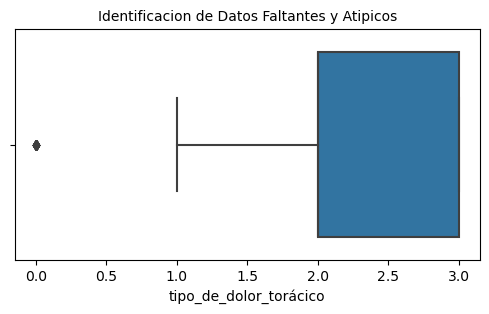

In [5]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['tipo_de_dolor_torácico'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

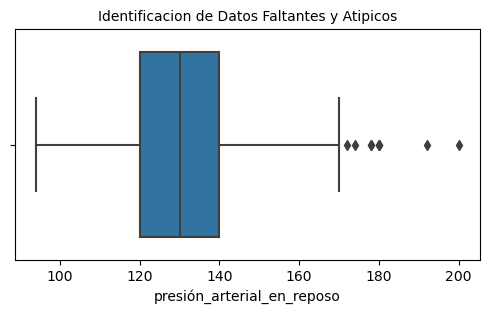

In [6]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['presión_arterial_en_reposo'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

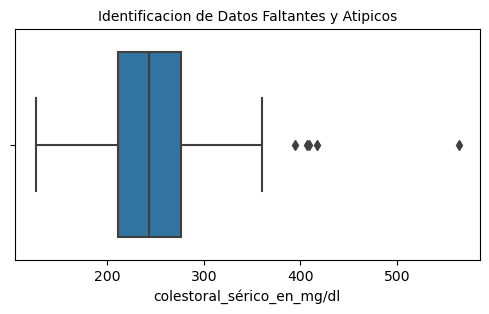

In [7]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['colestoral_sérico_en_mg/dl'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

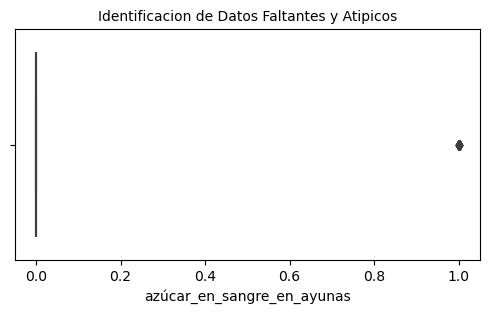

In [8]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['azúcar_en_sangre_en_ayunas'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

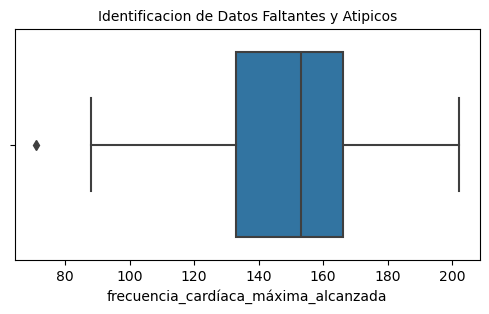

In [9]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['frecuencia_cardíaca_máxima_alcanzada'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

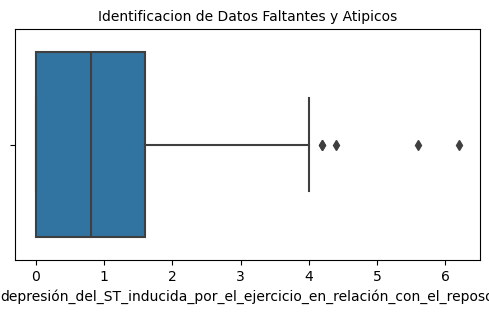

In [10]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['depresión_del_ST_inducida_por_el_ejercicio_en_relación_con_el_reposo'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

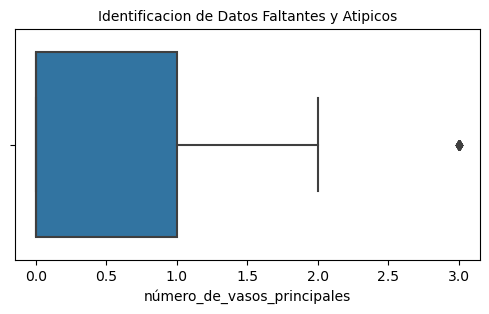

In [11]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['número_de_vasos_principales'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [12]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Depresión del ST Inducida por el Ejercicio en Relación con el Reposo: ",Datos['depresión_del_ST_inducida_por_el_ejercicio_en_relación_con_el_reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de Vasos Principales: ",Datos['número_de_vasos_principales'].isin([0]).sum())

Cantidad de Registros con cero en Depresión del ST Inducida por el Ejercicio en Relación con el Reposo:  96
Cantidad de Registros con cero en Número de Vasos Principales:  174


In [13]:
#Reemplazar todos los ceros con el valor promedio de la columna

Datos['depresión_del_ST_inducida_por_el_ejercicio_en_relación_con_el_reposo']=Datos['depresión_del_ST_inducida_por_el_ejercicio_en_relación_con_el_reposo'].replace(0,Datos['depresión_del_ST_inducida_por_el_ejercicio_en_relación_con_el_reposo'].mean())
Datos['número_de_vasos_principales']=Datos['número_de_vasos_principales'].replace(0,Datos['número_de_vasos_principales'].mean())

In [14]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en Depresión del ST Inducida por el Ejercicio en Relación con el Reposo: ",Datos['depresión_del_ST_inducida_por_el_ejercicio_en_relación_con_el_reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de Vasos Principales: ",Datos['número_de_vasos_principales'].isin([0]).sum())

Cantidad de Registros con cero en Depresión del ST Inducida por el Ejercicio en Relación con el Reposo:  0
Cantidad de Registros con cero en Número de Vasos Principales:  0


Text(0.5, 1.0, 'Identificación de datos atípicos')

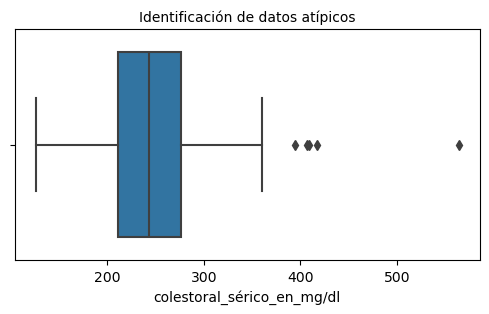

In [15]:
#Identificación de datos atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['colestoral_sérico_en_mg/dl'])
plt.title('Identificación de datos atípicos',fontsize=10)

In [16]:
#Conteo de Datos Atipicos

nivel_minimo=126
nivel_maximo=400
Total_Atipicos=((Datos['colestoral_sérico_en_mg/dl']<nivel_minimo)|(Datos['colestoral_sérico_en_mg/dl']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 4


In [17]:
#Filtro de Datos Atipicos

Datos=Datos[(Datos['colestoral_sérico_en_mg/dl']<nivel_maximo)&(Datos['colestoral_sérico_en_mg/dl']>nivel_minimo)]

In [18]:
#Validar si se removieron los datos aticpicos

Total_Atipicos=((Datos['colestoral_sérico_en_mg/dl']<nivel_minimo)|(Datos['colestoral_sérico_en_mg/dl']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [19]:
#Revision del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   edad                                                                  292 non-null    int64  
 1   sexo                                                                  292 non-null    int64  
 2   tipo_de_dolor_torácico                                                292 non-null    int64  
 3   presión_arterial_en_reposo                                            292 non-null    int64  
 4   colestoral_sérico_en_mg/dl                                            292 non-null    int64  
 5   azúcar_en_sangre_en_ayunas                                            292 non-null    int64  
 6   resultados_electrocardiográficos_en_reposo                            292 non-null    int64  
 7   frec

3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristica de interes:

Enfermedad Cardiaca: Si la persona tiene enfermedad cardiaca o no (0 = Sin enfermedad - 1 = Enfermedad)

Predecir si una persona puede tener enfermedad cardiaca

In [20]:
#Total de personas con enfermedad cardiaca

Datos['condición'].value_counts()

condición
0    157
1    135
Name: count, dtype: int64

In [21]:
Datos[['condición']].head(40)

,condición
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [22]:
#Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%

#Se crean variables X y Y para almacenar la información del entrenamiento

X=Datos.drop('condición',axis=1)
Y=Datos['condición']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [23]:
print (X_train)

     edad  sexo  tipo_de_dolor_torácico  presión_arterial_en_reposo  \
141    44     1                       2                         120   
256    52     1                       3                         108   
243    55     0                       3                         128   
292    40     1                       3                         152   
185    62     0                       3                         140   
..    ...   ...                     ...                         ...   
116    52     0                       2                         136   
32     58     0                       1                         136   
190    62     0                       3                         150   
281    44     1                       3                         110   
20     40     1                       0                         140   

     colestoral_sérico_en_mg/dl  azúcar_en_sangre_en_ayunas  \
141                         226                           0   
256                  

In [24]:
print (Y_train)

141    0
256    0
243    1
292    1
185    1
      ..
116    0
32     1
190    1
281    1
20     0
Name: condición, Length: 219, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [25]:
#Construir el modelo de regresión logistica

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, Y_train)

#Crea el modelo de predicción

Prediccion = modelo_regresion.predict(X_test)

In [26]:
print(Y_test)

111    0
184    1
30     0
276    0
113    0
      ..
107    0
269    1
92     0
246    1
76     1
Name: condición, Length: 73, dtype: int64


In [27]:
print(Prediccion)

[1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-Score, etc

In [28]:
#Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        39
           1       0.90      0.79      0.84        34

    accuracy                           0.86        73
   macro avg       0.87      0.86      0.86        73
weighted avg       0.87      0.86      0.86        73



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

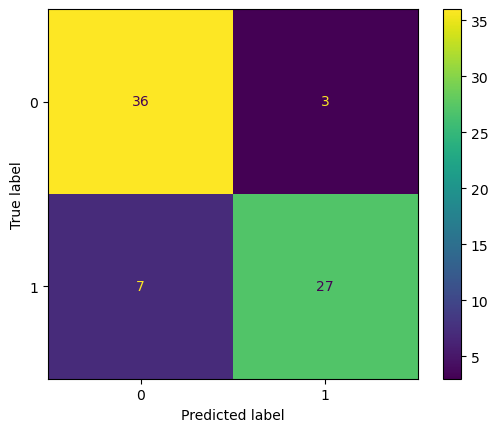

In [29]:
#Matriz de confusión del modelo

cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

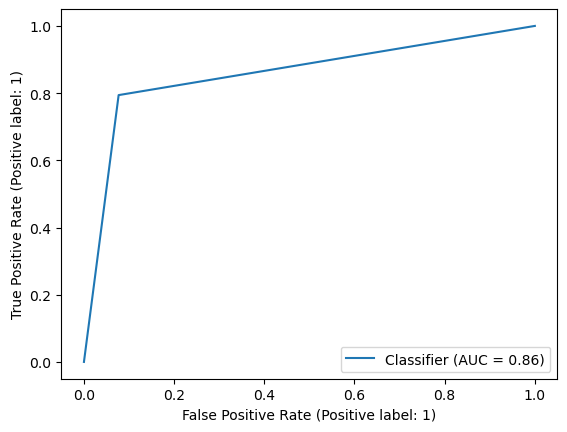

In [31]:
#Curva de precision del modelo

RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()